
# STC Jawwy

In [1]:
"""
Here we install libraries that are not installed by default
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb
!pip install pandas matplotlib prophet

In [8]:
# الخطوة الثانية: استيراد المكتبات
import pandas as pd
import matplotlib.pyplot as plt
import re
from prophet import Prophet
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset includes total watching hours for customers per day.

You are required to work on predecting the forecast for the watching hours.

In [12]:
# الخطوة الثالثة: إدخال البيانات الأولية المستخرجة من EXCEL SHEET (OCR)
raw_data = [
    "2018-01-0 1123.5519", "2018-01-C 1000.129;", "2018-01-0881.92444", "2018-01-C 782.66944",
    "2018-01-0 1051.9394", "2018-01-0841.1783:", "2018-01-0 873.495", "2018-01-1 970.475",
    "2018-01-1721.38194", "2018-01-1 772.675", "2018-01-1714.99388", "2018-01-1805.5886:",
    "2018-01-1868.4802;", "2018-01-1784.4961:", "2018-01-1707.3611:", "2018-01-2 1016.186(",
    "2018-01-2872.0452;", "2018-01-2900.68638", "2018-01-2 761.17638", "2018-01-2 896.3708",
    "2018-01-2816.40138", "2018-01-3 942.50222", "2018-01-3825.30666", "2018-02-C 1053.1686",
    "2018-02-0911.46055", "2018-02-C 1012.0822", "2018-02-C 1025.5955", "2018-02-0 796.77166",
    "2018-02-0 795.38916", "2018-02-C 950.52", "2018-02-1747.4708:", "2018-02-1797.90555",
    "2018-02-1863.67888", "2018-02-1715.1741(", "2018-02-1946.04194", "2018-02-1731.57916",
    "2018-02-2648.1911:", "2018-02-2742.0466(", "2018-02-2821.65444", "2018-02-2784.79388",
    "2018-02-2713.45805", "2018-02-2739.0086:", "2018-02-2673.30138", "2018-03-C 742.24138",
    "2018-03-0564.69583", "2018-03-0788.73888", "2018-03-C 707.05277", "2018-03-0782.6436:",
    "2018-03-0735.63305", "2018-03-0786.6911:", "2018-03-1803.1025", "2018-03-1796.0661:",
    "2018-03-1856.06388", "2018-03-1708.75527", "2018-03-1840.4061:", "2018-03-1766.41944",
    "2018-03-2 662.195", "2018-03-2 760.2508:", "2018-03-2981.62694", "2018-03-2 756.74833",
    "2018-03-2814.9961:", "2018-03-2 679.40472", "2018-03-2562.12472", "2018-03-2 750.45",
    "2018-03-3755.97666", "2018-04-C 765.18638", "2018-04-0 635.7502;", "2018-04-0 714.82138",
    "2018-04-0 835.53138", "2018-04-0 728.9091(", "2018-04-C 605.4136:", "2018-04-1760.44222",
    "2018-04-1611.6586:", "2018-04-1603.8777", "2018-04-1740.08888", "2018-04-1682.1761:",
    "2018-04-1750.94444", "2018-04-1566.10444", "2018-04-1586.40444", "2018-04-2 700.2966(",
    "2018-04-2 670.88555", "2018-04-2 652.6252;", "2018-04-2 650.42888", "2018-04-2 675.18444",
    "2018-04-2 601.73805", "2018-04-3 609.2816("
]

In [13]:
# الخطوة الرابعة: تنظيف وإعداد البيانات
# قائمة لتخزين عدد المشاهدات النظيفة
cleaned_views = []

for item in raw_data:
    # استخدام التعبيرات النمطية (Regex) لاستخراج الجزء الرقمي فقط
    # هذا النمط يبحث عن رقم عشري قد يبدأ بـ 4 أرقام أو أقل
    match = re.search(r'(\d{1,4}\.\d+)', item)
    if match:
        # إذا وجد تطابق، قم بإضافته للقائمة
        cleaned_views.append(float(match.group(1)))
    else:
        # في حال لم يجد تطابقاً (مثل 950.52)، ابحث عن نمط آخر
        match = re.search(r'(\s\d+\.?\d*)', item)
        if match:
            cleaned_views.append(float(match.group(1).strip()))

# إنشاء DataFrame
df = pd.DataFrame()

# التاريخ غير موثوق به في البيانات الأولية، لذلك سنقوم بإنشاء تسلسل زمني صحيح
# عدد السجلات هو 86
num_records = len(cleaned_views)
# إنشاء نطاق تاريخي يبدأ من 2018-01-01
df['ds'] = pd.to_datetime(pd.date_range(start='2018-01-01', periods=num_records))

# إضافة عمود المشاهدات
df['y'] = cleaned_views

print("البيانات بعد التنظيف:")
print(df.head())
print(f"\nتم تجهيز {len(df)} سجلاً.")

البيانات بعد التنظيف:
          ds           y
0 2018-01-01  1123.55190
1 2018-01-02  1000.12900
2 2018-01-03   881.92444
3 2018-01-04   782.66944
4 2018-01-05  1051.93940

تم تجهيز 86 سجلاً.



--- التحليل الاستكشافي وتحديد أوقات الذروة ---


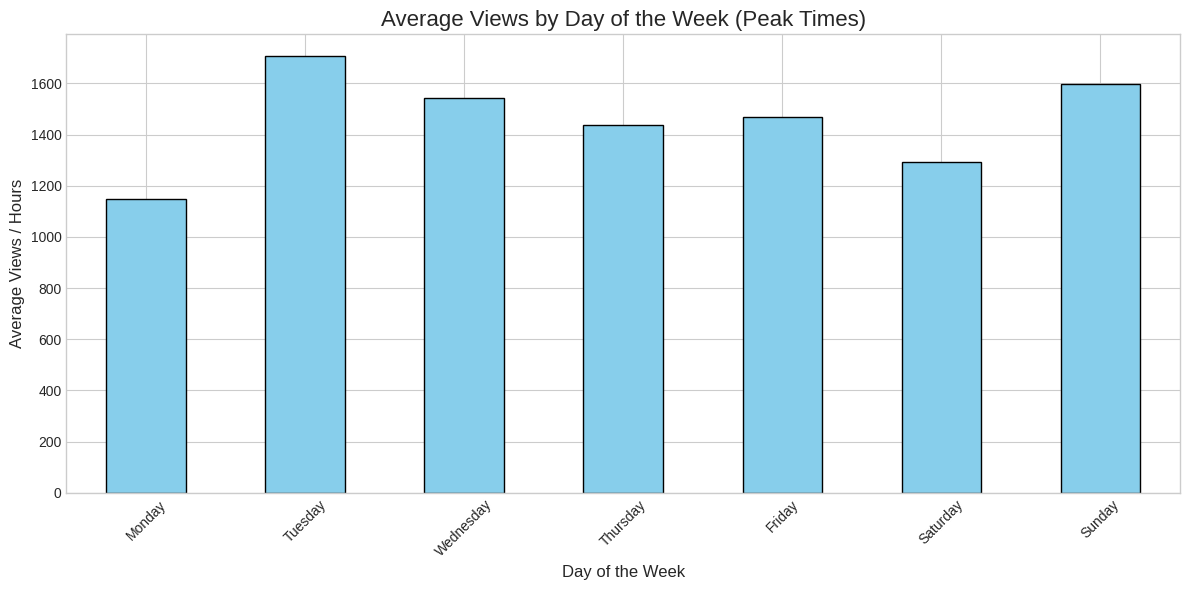


تحليل أوقات الذروة:
day_of_week
Monday       1147.442470
Tuesday      1706.108792
Wednesday    1540.738424
Thursday     1436.786232
Friday       1468.133245
Saturday     1294.237311
Sunday       1597.952489
Name: y, dtype: float64


In [14]:
# الخطوة الخامسة: التحليل الاستكشافي للبيانات (EDA) وتحديد أوقات الذروة
print("\n--- التحليل الاستكشافي وتحديد أوقات الذروة ---")

# إنشاء نسخة من DataFrame للتحليل
df_analysis = df.copy()
df_analysis['day_of_week'] = df_analysis['ds'].dt.day_name()

# حساب متوسط المشاهدات لكل يوم من أيام الأسبوع
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_views_by_day = df_analysis.groupby('day_of_week')['y'].mean().reindex(day_order)

# رسم بياني لتوضيح أوقات الذروة
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))
avg_views_by_day.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')

ax.set_title('Average Views by Day of the Week (Peak Times)', fontsize=16)
ax.set_xlabel('Day of the Week', fontsize=12)
ax.set_ylabel('Average Views / Hours', fontsize=12)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

print("\nتحليل أوقات الذروة:")
print(avg_views_by_day)

In [15]:
# الخطوة السادسة: بناء نموذج التنبؤ باستخدام Prophet
print("\n--- بناء نموذج التنبؤ للشهرين القادمين ---")

# تهيئة النموذج
# Prophet يتعرف تلقائياً على النمط الأسبوعي
model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=True)

# تدريب النموذج على البيانات المتاحة
model.fit(df)

# إنشاء إطار بيانات مستقبلي للتنبؤ بـ 60 يوماً (شهرين)
future = model.make_future_dataframe(periods=60)

# إجراء التنبؤ
forecast = model.predict(future)

print("\nتم إنشاء التنبؤات. عرض النتائج...")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


--- بناء نموذج التنبؤ للشهرين القادمين ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpiyvug_82/6h42zg0v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiyvug_82/hkh_ixme.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83182', 'data', 'file=/tmp/tmpiyvug_82/6h42zg0v.json', 'init=/tmp/tmpiyvug_82/hkh_ixme.json', 'output', 'file=/tmp/tmpiyvug_82/prophet_model_pytfzjn/prophet_model-20250804111112.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:11:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



تم إنشاء التنبؤات. عرض النتائج...
            ds         yhat  yhat_lower   yhat_upper
141 2018-05-22  1348.194611  361.603227  2387.878007
142 2018-05-23  1170.065613  177.362271  2250.060761
143 2018-05-24  1066.108245   56.096043  2093.202561
144 2018-05-25  1097.449215  103.328983  2101.262002
145 2018-05-26   923.549403  -32.183635  1934.057750


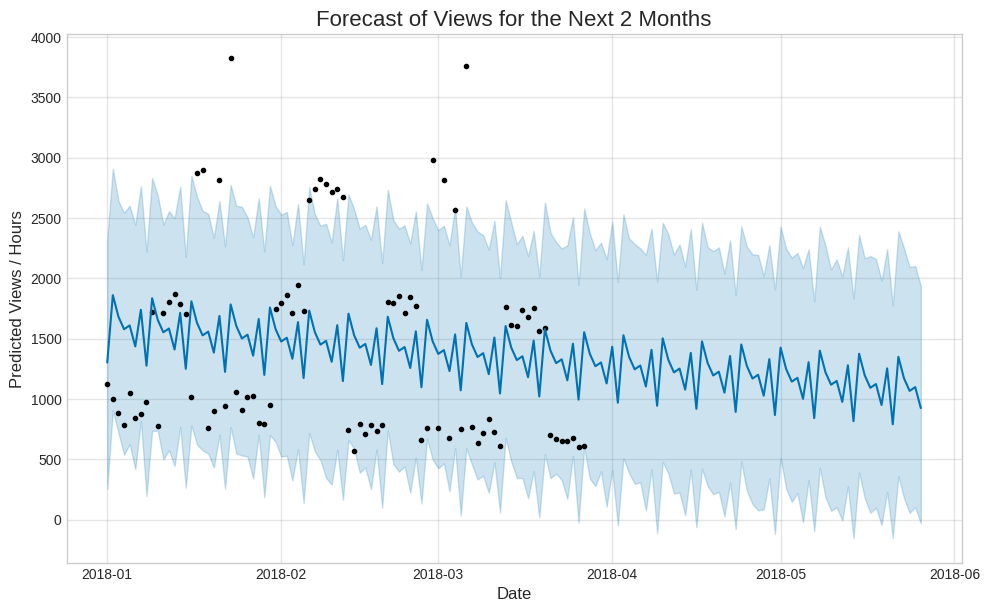

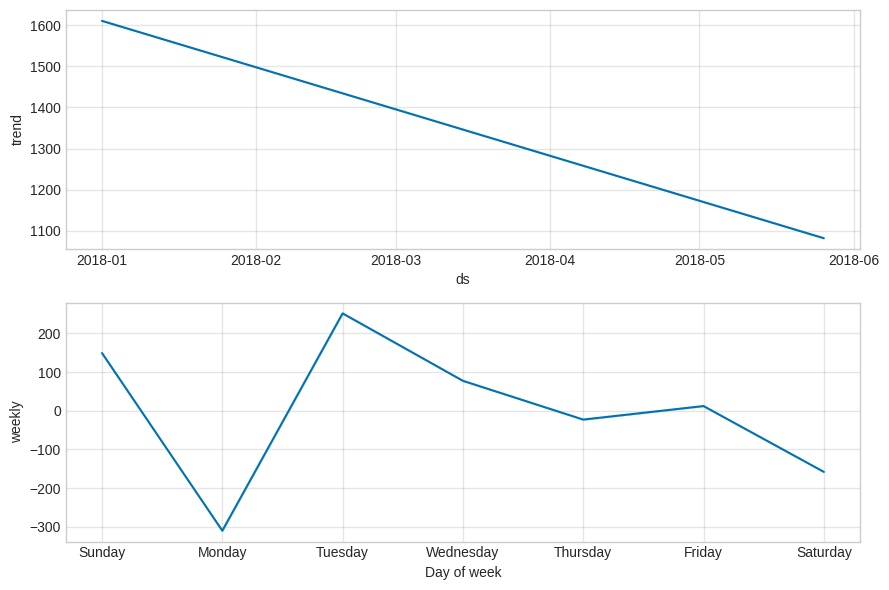


--- انتهى التحليل ---
الرسوم البيانية أعلاه توضح التوقعات المستقبلية والأنماط التي اكتشفها النموذج.


In [16]:
# الخطوة السابعة: عرض نتائج التنبؤ بشكل مرئي

# 1. رسم بياني للتنبؤات الكاملة
fig1 = model.plot(forecast)
ax = fig1.gca()
ax.set_title('Forecast of Views for the Next 2 Months', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Predicted Views / Hours', fontsize=12)
plt.show()


# 2. رسم بياني لمكونات النموذج (الاتجاه العام والنمط الأسبوعي)
fig2 = model.plot_components(forecast)
plt.show()
print("\n--- انتهى التحليل ---")
print("الرسوم البيانية أعلاه توضح التوقعات المستقبلية والأنماط التي اكتشفها النموذج.")